# Step 1: Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the datasets


In [2]:
weather_data = pd.read_csv('/content/weather_prediction_dataset.csv')
bbq_labels = pd.read_csv('/content/weather_prediction_bbq_labels.csv')

# # Step 3:show datasets

In [3]:
weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
bbq_labels.head()

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# I wanna select OSLO_BBQ_weather as y and related features as x

# Step 4: Merge datasets on the 'DATE' column


In [5]:
merged_data = pd.merge(weather_data, bbq_labels, on='DATE')
merged_data .head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,False,False,False,False,False,False,False,False,False,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,False,False,False,False,False,False,False,False,False,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,False,False,False,False,False,False,False,False,False,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,False,False,False,False,False,False,False,False,False,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,False,False,False,False,False,False,False,False,False,False


# Step 5:Check for missing values in merged_data


In [6]:
# Count missing values in all column using isna() method
missing_counts = merged_data.isna().sum().sum()
missing_counts

0

In [7]:
merged_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,False,False,False,False,False,False,False,False,False,False
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,False,False,False,False,False,False,False,False,False,False
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,False,False,False,False,False,False,False,False,False,False
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,False,False,False,False,False,False,False,False,False,False
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,False,False,False,False,False,False,False,False,False,False


# Step 6: define X and y

In [8]:
# Filter columns related to Oslo and include the date
oslo_columns = merged_data.filter(like='OSLO')

# Create X with 'DATE', 'MONTH', and Oslo-related columns
X = pd.concat([merged_data[['DATE', 'MONTH']], merged_data[oslo_columns.columns]], axis=1)

# Drop the target variable OSLO_BBQ_weather from X
X.drop('OSLO_BBQ_weather', axis=1, inplace=True)

# Target variable
y = merged_data['OSLO_BBQ_weather']

X


,DATE,MONTH,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,20000101,1,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2
1,20000102,1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4
2,20000103,1,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8
3,20000104,1,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1
4,20000105,1,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,4,1.2,5.3,0.88,0.9954,0.16,0.00,4.8,-10.1,-11.7,-5.9
3650,20091229,12,1,0.7,4.1,0.88,1.0060,0.16,0.00,4.9,-13.1,-15.1,-9.1
3651,20091230,12,0,0.6,3.5,0.85,1.0094,0.16,0.00,4.4,-15.7,-17.5,-11.8
3652,20091231,12,5,0.6,2.4,0.88,1.0062,0.11,0.02,1.7,-10.8,-16.8,-8.9


In [9]:
merged_data[oslo_columns.columns]

,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,OSLO_BBQ_weather
0,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2,False
1,6,1.9,5.7,0.94,1.0076,0.11,0.00,1.6,-0.8,-6.7,2.4,False
2,6,1.7,8.7,0.88,1.0016,0.04,0.00,0.0,1.2,-1.1,3.8,False
3,1,3.4,11.8,0.58,0.9982,0.13,0.00,5.3,2.1,-0.5,5.1,False
4,8,1.2,5.7,0.94,1.0055,0.05,0.06,0.0,-0.7,-4.0,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3649,4,1.2,5.3,0.88,0.9954,0.16,0.00,4.8,-10.1,-11.7,-5.9,False
3650,1,0.7,4.1,0.88,1.0060,0.16,0.00,4.9,-13.1,-15.1,-9.1,False
3651,0,0.6,3.5,0.85,1.0094,0.16,0.00,4.4,-15.7,-17.5,-11.8,False
3652,5,0.6,2.4,0.88,1.0062,0.11,0.02,1.7,-10.8,-16.8,-8.9,False


In [10]:
y

,OSLO_BBQ_weather
0,False
1,False
2,False
3,False
4,False
...,...
3649,False
3650,False
3651,False
3652,False


In [11]:
# Convert boolean values to numeric (1 for True, 0 for False)
y = y.astype(int)
y

,OSLO_BBQ_weather
0,0
1,0
2,0
3,0
4,0
...,...
3649,0
3650,0
3651,0
3652,0


# Step 6: correlations

In [12]:
import numpy as np

# Calculate Pearson correlation coefficients
correlations = X.corrwith(y)

# Absolute values of correlations for better interpretation
correlations = correlations.abs()

# Sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)


OSLO_global_radiation    0.606420
OSLO_temp_max            0.588684
OSLO_temp_mean           0.560277
OSLO_sunshine            0.512060
OSLO_temp_min            0.473198
OSLO_humidity            0.436719
OSLO_cloud_cover         0.302656
OSLO_precipitation       0.210962
OSLO_pressure            0.162005
MONTH                    0.053296
OSLO_wind_gust           0.034094
OSLO_wind_speed          0.029494
DATE                     0.012782
dtype: float64


# Step 7: Feature Selection

### About Correlation

1-Strong Correlation (Close to ±1):
When the absolute value of the correlation coefficient is close to 1 (either positive or negative), it indicates a strong linear relationship between the two variables. For example, an absolute correlation coefficient of 0.8 or higher suggests a strong linear association between the variables.

2-Weak Correlation (Close to 0):

When the absolute value of the correlation coefficient is close to 0, it indicates a weak linear relationship or no linear relationship between the variables. A coefficient near 0 means that changes in one variable are not strongly associated with changes in the other variable.


In [13]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression  # Example classifier for RFE
from sklearn.ensemble import RandomForestClassifier  # Example classifier for SelectFromModel
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
# Replace these with your actual data

# Calculate correlation coefficients between features and target
correlations = X.corrwith(y)

# Select features with high correlation coefficients
high_corr_features = correlations[abs(correlations) > 0.3].index  # Adjust correlation threshold as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of features to select for SelectKBest and RFE
k_best_features = 10  # Adjust as needed
rfe_num_features = 15  # Adjust as needed

# Step 1: Apply different feature selection methods
# Method 1: SelectKBest with mutual information
skb_mi = SelectKBest(score_func=mutual_info_classif, k=k_best_features)
X_skb_mi = skb_mi.fit_transform(X_train, y_train)
selected_features_skb_mi = X.columns[skb_mi.get_support(indices=True)]

# Method 2: SelectKBest with ANOVA F-value
skb_f = SelectKBest(score_func=f_classif, k=k_best_features)
X_skb_f = skb_f.fit_transform(X_train, y_train)
selected_features_skb_f = X.columns[skb_f.get_support(indices=True)]

# Method 3: Recursive Feature Elimination (RFE) with Logistic Regression
rfe_lr = RFE(LogisticRegression(), n_features_to_select=rfe_num_features)
X_rfe_lr = rfe_lr.fit_transform(X_train, y_train)
selected_features_rfe_lr = X.columns[rfe_lr.get_support(indices=True)]

# Method 4: Lasso-based feature selection
lasso_model = RandomForestClassifier()  # Example classifier for SelectFromModel
lasso_selector = SelectFromModel(lasso_model)
X_lasso = lasso_selector.fit_transform(X_train, y_train)
selected_features_lasso = X.columns[lasso_selector.get_support(indices=True)]

# Step 2: Intersect the selected features from different methods
selected_features_intersection = set(selected_features_skb_mi) & set(selected_features_skb_f) & \
                                set(selected_features_rfe_lr) & set(selected_features_lasso)

# Add high correlated features to the selected features
final_selected_features = list(selected_features_intersection.union(high_corr_features))

print("Final Selected Features:", final_selected_features)



Final Selected Features: ['OSLO_precipitation', 'OSLO_sunshine', 'OSLO_humidity', 'OSLO_temp_min', 'OSLO_cloud_cover', 'OSLO_global_radiation', 'OSLO_temp_max', 'OSLO_temp_mean']


In [14]:
high_corr_features

Index(['OSLO_cloud_cover', 'OSLO_humidity', 'OSLO_global_radiation',
       'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [15]:
selected_features_skb_mi

Index(['DATE', 'MONTH', 'OSLO_cloud_cover', 'OSLO_humidity',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [16]:
selected_features_skb_f

Index(['MONTH', 'OSLO_cloud_cover', 'OSLO_humidity', 'OSLO_pressure',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [17]:
selected_features_rfe_lr

Index(['DATE', 'MONTH', 'OSLO_cloud_cover', 'OSLO_wind_speed',
       'OSLO_wind_gust', 'OSLO_humidity', 'OSLO_pressure',
       'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max'],
      dtype='object')

In [18]:
selected_features_lasso

Index(['OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_sunshine',
       'OSLO_temp_mean', 'OSLO_temp_max'],
      dtype='object')

In [19]:
selected_features_intersection

{'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_max',
 'OSLO_temp_mean'}

In [20]:
final_selected_features

['OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_humidity',
 'OSLO_temp_min',
 'OSLO_cloud_cover',
 'OSLO_global_radiation',
 'OSLO_temp_max',
 'OSLO_temp_mean']

# Step 8: Define new X and y based on new features

In [21]:
X=X[final_selected_features]
X

,OSLO_precipitation,OSLO_sunshine,OSLO_humidity,OSLO_temp_min,OSLO_cloud_cover,OSLO_global_radiation,OSLO_temp_max,OSLO_temp_mean
0,0.60,0.0,0.94,-8.6,7,0.04,-3.2,-5.0
1,0.00,1.6,0.94,-6.7,6,0.11,2.4,-0.8
2,0.00,0.0,0.88,-1.1,6,0.04,3.8,1.2
3,0.00,5.3,0.58,-0.5,1,0.13,5.1,2.1
4,0.06,0.0,0.94,-4.0,8,0.05,0.5,-0.7
...,...,...,...,...,...,...,...,...
3649,0.00,4.8,0.88,-11.7,4,0.16,-5.9,-10.1
3650,0.00,4.9,0.88,-15.1,1,0.16,-9.1,-13.1
3651,0.00,4.4,0.85,-17.5,0,0.16,-11.8,-15.7
3652,0.02,1.7,0.88,-16.8,5,0.11,-8.9,-10.8


In [22]:
y

,OSLO_BBQ_weather
0,0
1,0
2,0
3,0
4,0
...,...
3649,0
3650,0
3651,0
3652,0



### Dropout is a regularization technique commonly used in neural networks to prevent overfitting. While dropout can help in improving the generalization ability of the model and reduce overfitting, it is not specifically designed to address multicollinearity issues in the input features.

# Step 9: Train and evaluate models

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming X and y are already defined and preprocessed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Artificial Neural Network': Sequential([
        Dense(units=100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),  # Add dropout with a dropout rate of 20%
        Dense(units=1, activation='sigmoid')
    ])
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    if isinstance(model, Sequential):  # For TensorFlow models
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
        accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    else:  # For scikit-learn models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
print("Accuracy Scores:")
for name, acc in results.items():
    print(f"{name}: {acc}")


Accuracy Scores:
Logistic Regression: 0.9658002735978112
Support Vector Machine: 0.9589603283173734
Random Forest: 1.0
K-Nearest Neighbors: 0.9343365253077975
Gaussian Naive Bayes: 0.9192886456908345
Decision Tree: 1.0
Artificial Neural Network: 0.9658002853393555


# Step 10: Compare result
## Step 10.1: Accuracy Scores

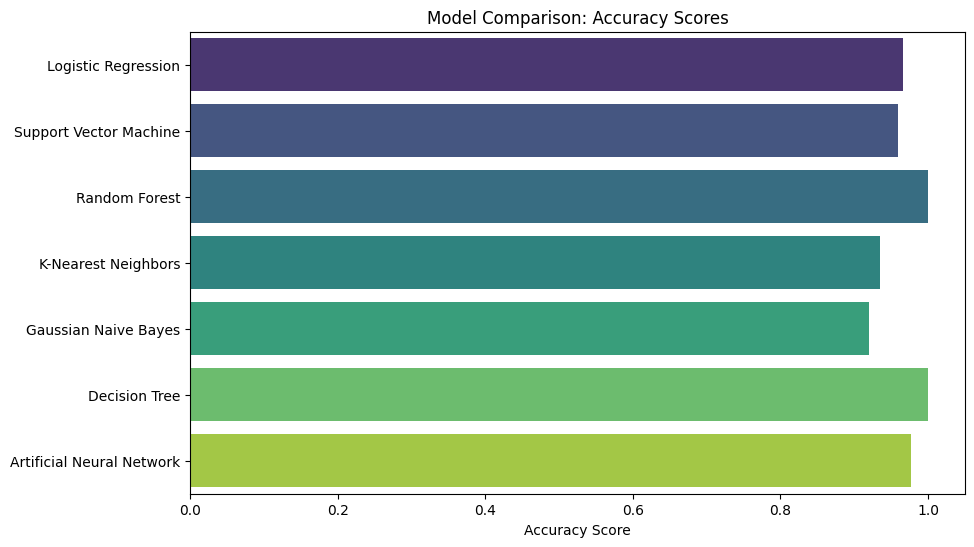

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their accuracy scores (replace these with your actual results)
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Artificial Neural Network']
accuracy_scores = [0.9658, 0.9589, 1.0, 0.9343, 0.9193, 1.0, 0.9767]

# Create a bar plot for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette='viridis')
plt.xlabel('Accuracy Score')
plt.title('Model Comparison: Accuracy Scores')
plt.show()


# Step 10.2: Correlation Heatmap

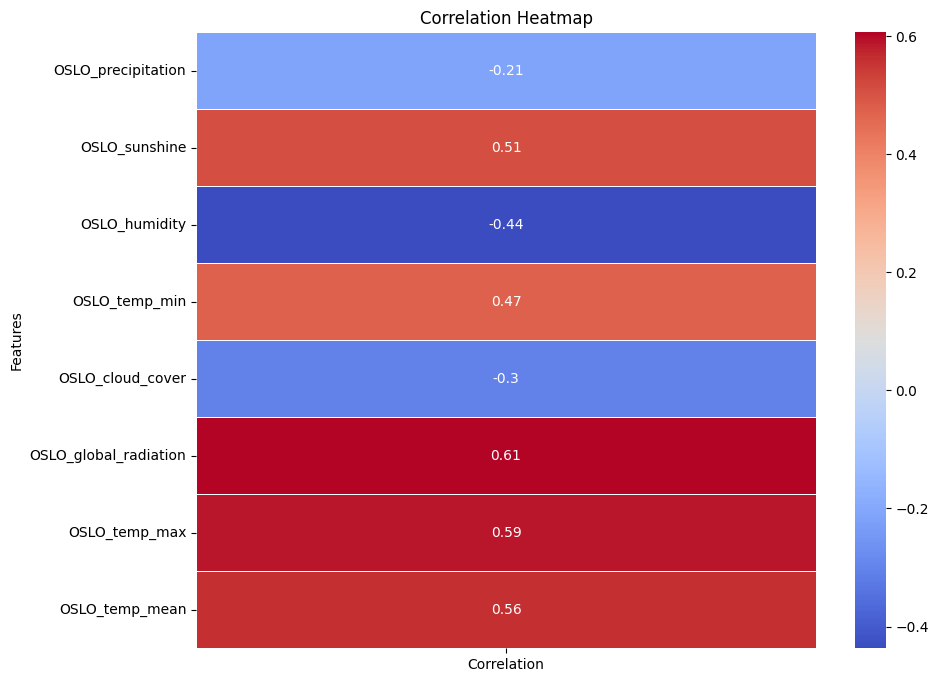

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation coefficients between features and target
correlations = X.corrwith(y)

# Create a dataframe for visualization
corr_df = pd.DataFrame({'Features': correlations.index, 'Correlation': correlations.values})
corr_df = corr_df.set_index('Features')

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


# Step 10.3:feature_importances

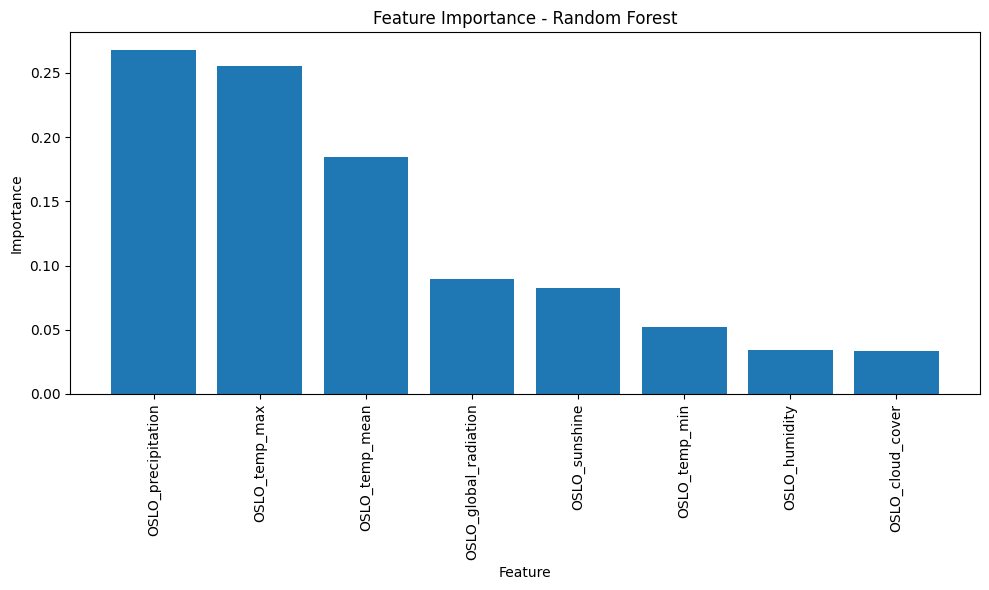

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Step 10.4:Confusion Matrix

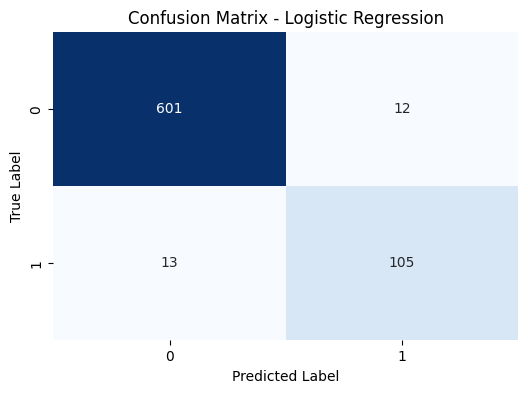

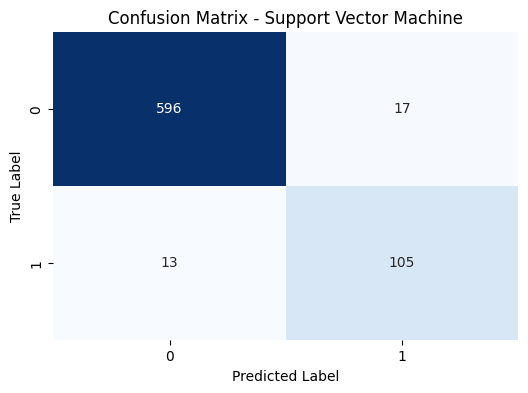

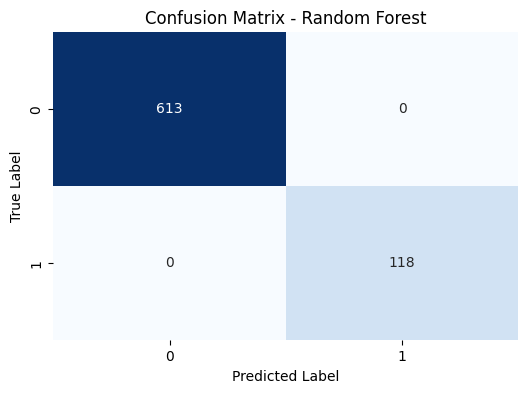

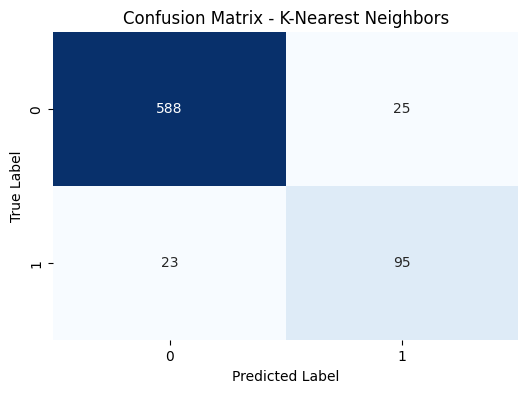

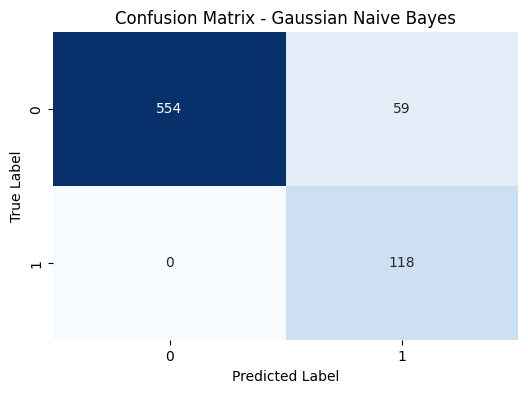

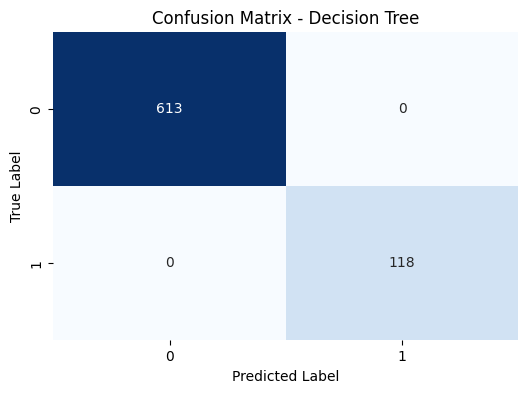

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7869 - loss: 0.5105
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


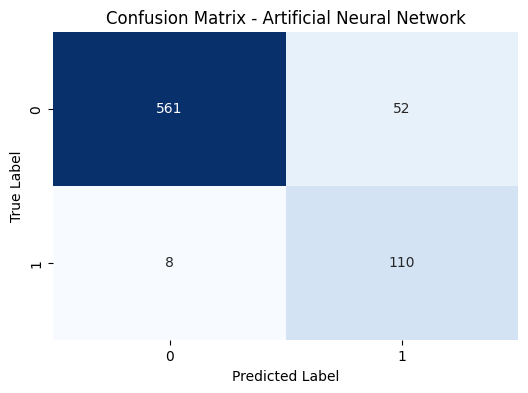

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize models as a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Artificial Neural Network': Sequential([
        Dense(units=100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),  # Add dropout with a dropout rate of 20%
        Dense(units=1, activation='sigmoid')
    ])
}

# Train each model and calculate confusion matrix
for name, model in models.items():
    if name == 'Artificial Neural Network':
        # Compile the ANN model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == 'Artificial Neural Network':
        y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Step 11: Metric Calculation

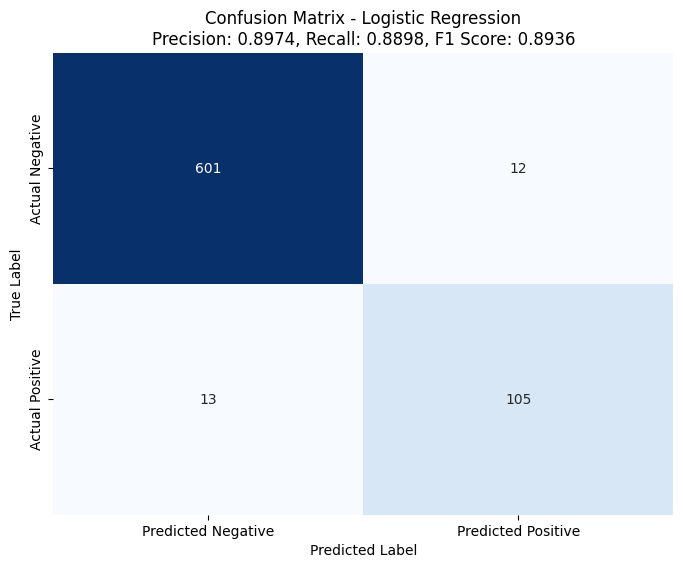

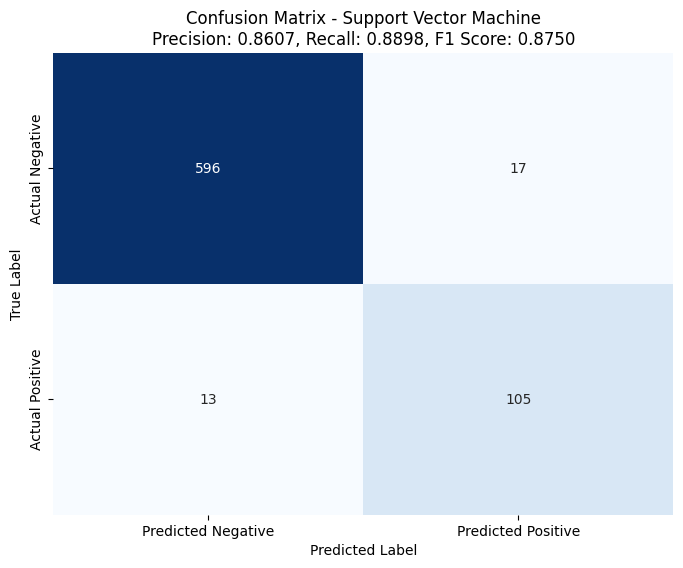

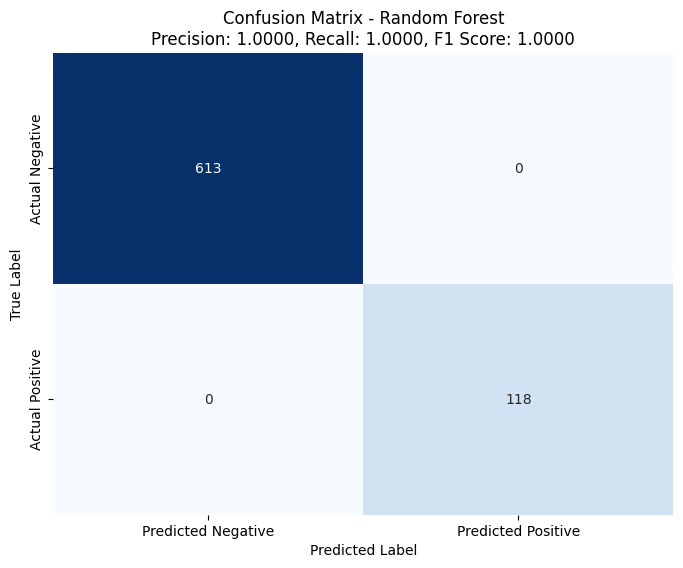

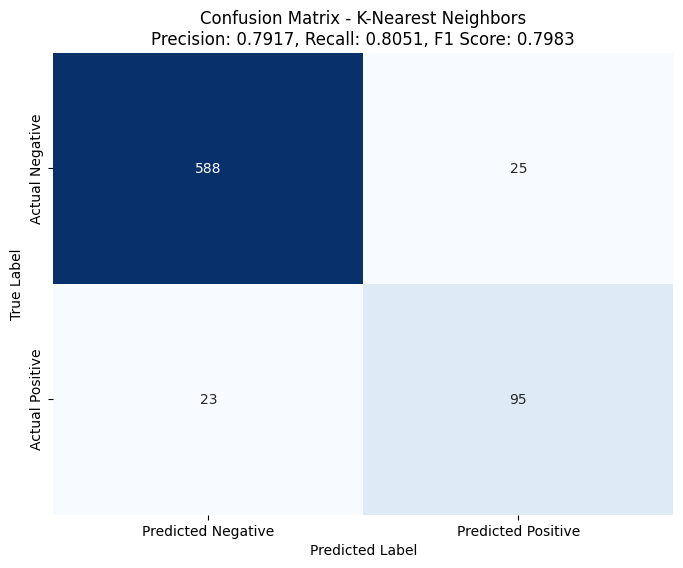

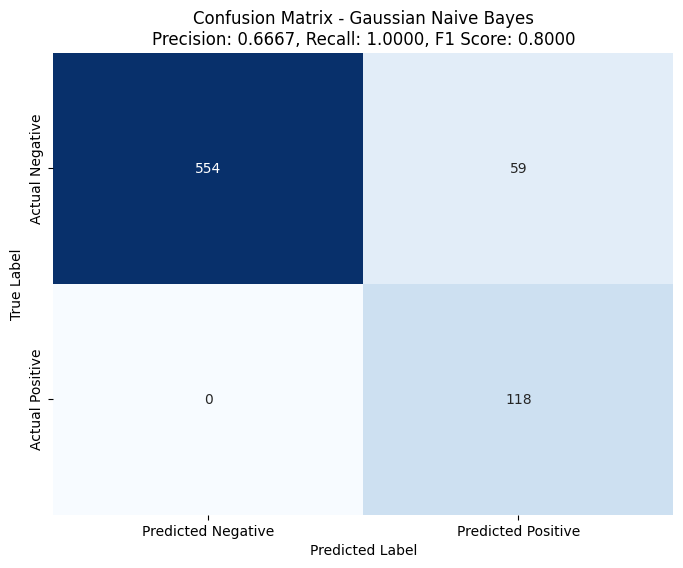

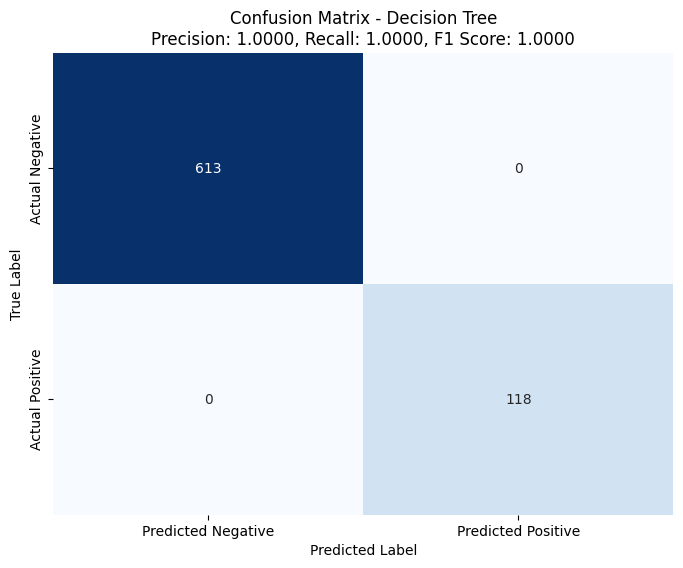

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9105 - loss: 0.2395
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


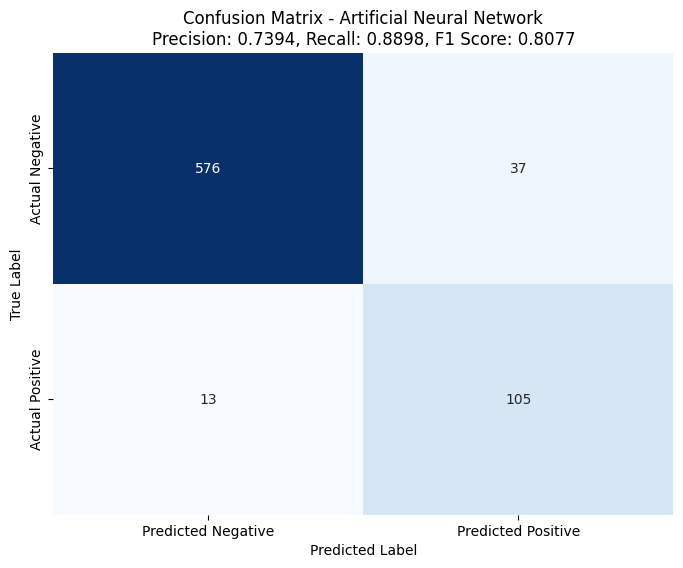

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


# Train each model and calculate confusion matrix
for name, model in models.items():
    if name == 'Artificial Neural Network':
        # Compile the ANN model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == 'Artificial Neural Network':
        y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Plot confusion matrix with additional metrics annotations
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {name}\nPrecision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
